In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # Import for train-test splitting
import datetime
import pickle

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv")
df= df.drop(0)
# df.set_index('date', inplace=True)
# df.sort_index(inplace=True)

df = df.sort_values('date', ascending=True)
df.head()

,date,close,volume,open,high,low
756,2015/10/15,221.31,2835920.0000,216.43,221.7300,213.70
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.87
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.94
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.00
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.80


## Add High Changing Percentage and Percentage Change

In [3]:
df['HT_PCT'] = (df['high'] - df['close']) / df['close'] * 100
df['PCT_Change'] = (df['close'] - df['open']) / df['open'] * 100
df.head()

new_df = df[['date', 'HT_PCT', 'PCT_Change']]
new_df.head()
df.head()

,date,close,volume,open,high,low,HT_PCT,PCT_Change
756,2015/10/15,221.31,2835920.0000,216.43,221.7300,213.70,0.189779,2.254771
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.87,1.528787,1.779950
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.94,1.337133,0.706402
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.00,7.308830,-6.450905
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.80,2.246656,-0.896269


# Regression Model with Shifting Method

In [4]:
forcast_col = 'close'
df.fillna(-99999, inplace=True)
forcast_out = int(math.ceil(0.01 * len(df) ))
df['predict_close_price'] = df[forcast_col].shift(-forcast_out)
df.dropna(inplace=True)
df.head(12)

,date,close,volume,open,high,low,HT_PCT,PCT_Change,predict_close_price
756,2015/10/15,221.31,2835920.0000,216.43,221.7300,213.70,0.189779,2.254771,210.35
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.87,1.528787,1.779950,212.96
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.94,1.337133,0.706402,211.63
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.00,7.308830,-6.450905,206.93
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.80,2.246656,-0.896269,213.79
751,2015/10/22,211.72,2818801.0000,211.56,215.7500,209.40,1.903457,0.075629,208.35
750,2015/10/23,209.09,4226411.0000,215.00,215.3500,207.69,2.993926,-2.748837,231.63
749,2015/10/26,215.26,3388227.0000,211.38,215.8800,210.00,0.288024,1.835557,231.77
748,2015/10/27,210.35,3512832.0000,214.84,217.1000,207.51,3.208937,-2.089927,232.36
747,2015/10/28,212.96,2726880.0000,211.31,213.4500,208.30,0.230090,0.780843,225.33


## Check the Accurancy of the Shifting Method using Linear Regression

In [5]:
X = np.array(df.drop(['predict_close_price', 'date', 'open', 'high', 'low', 'close'], axis=1))
print(X[0])
y = np.array(df['predict_close_price'])
X = preprocessing.scale(X) # Make a Normal Distribution
print(X[0])

['2835920.0000' 0.18977904297139192 2.2547705955736244]
[-0.85486124 -0.96256449  0.97887542]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print("Accuracy with linear regression is:", accuracy)

Accuracy with linear regression is: 0.037119472947005794


## Check the Accuracy with SVM(Support Vector Machine) (Only Test Purpose)

In [7]:
clf_svm = svm.SVR()
clf_svm.fit(X_train, y_train)
accuracy_svm = clf.score(X_test, y_test)

print("Accuracy with svm is:", accuracy_svm)

Accuracy with svm is: 0.037119472947005794


# Forcasting and Predicting 

In [8]:
forcast_col = 'close'
df.fillna(-99999, inplace=True)
forcast_out = int(math.ceil(0.01 * len(df) ))
df['predict_close_price'] = df[forcast_col].shift(-forcast_out)

X = np.array(df.drop(['predict_close_price', 'date', 'open', 'high', 'low', 'close'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forcast_out: ] 
X = X[:-forcast_out] 
df.dropna(inplace=True)
y = np.array(df['predict_close_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

forcast_set = clf.predict(X_lately)
print(forcast_set, accuracy, forcast_out)

[270.87440683 266.63275618 270.91157939 284.51707688 455.33308869
 419.05048412 285.39224834 281.49420138] -0.13239097919748088 8


In [9]:
df['Forcast'] = np.nan

last_date_data = df.iloc[-1]['date']
last_date = pd.to_datetime(last_date_data)
one_day = 86400
last_unix = last_date.timestamp()
next_unix = last_unix + one_day
print(last_date)
df.head()

2018-09-21 00:00:00


,date,close,volume,open,high,low,HT_PCT,PCT_Change,predict_close_price,Forcast
756,2015/10/15,221.31,2835920.0000,216.43,221.7300,213.70,0.189779,2.254771,210.35,NaN
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.87,1.528787,1.779950,212.96,NaN
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.94,1.337133,0.706402,211.63,NaN
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.00,7.308830,-6.450905,206.93,NaN
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.80,2.246656,-0.896269,213.79,NaN


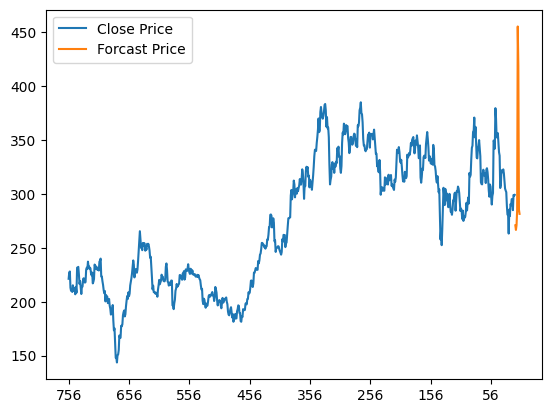

In [10]:
for i in forcast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) -1 )] + [i]

df['close'].plot(label="Close Price")
df['Forcast'].plot(label="Forcast Price")
plt.legend()
plt.show()